In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import cv2
import matplotlib.image as mpimg
import matplotlib.image as imread

import tensorflow
from tensorflow.keras.optimizers import SGD, Adam, Adadelta
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization ,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from IPython.display import clear_output
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [2]:
for dirname, _, filenames in os.walk(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_162.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_163.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_164.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_165.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_166.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_167.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_168.png
C:\Use

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_66.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_67.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_68.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_69.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_70.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_71.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C116P77ThinF_IMG_20150930_171809_cell_72.png
C:\Users\KIIT

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_165.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_166.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_167.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_168.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_169.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_170.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C119P80ThinF_IMG_20151002_122720_cell_171.png
C:\Use

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C129P90ThinF_IMG_20151004_133538_cell_106.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C129P90ThinF_IMG_20151004_133538_cell_107.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C129P90ThinF_IMG_20151004_133538_cell_75.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C129P90ThinF_IMG_20151004_133538_cell_76.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C129P90ThinF_IMG_20151004_133538_cell_77.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C129P90ThinF_IMG_20151004_133538_cell_78.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C129P90ThinF_IMG_20151004_133538_cell_79.png
C:\Users\KI

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C39P4thinF_original_IMG_20150622_111206_cell_78.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C39P4thinF_original_IMG_20150622_111206_cell_79.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C39P4thinF_original_IMG_20150622_111206_cell_80.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C39P4thinF_original_IMG_20150622_111206_cell_81.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C39P4thinF_original_IMG_20150622_111206_cell_82.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C39P4thinF_original_IMG_20150622_111206_cell_83.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C39P4thinF_origi

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C48P9thinF_IMG_20150721_160944_cell_224.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C48P9thinF_IMG_20150721_160944_cell_225.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C48P9thinF_IMG_20150721_160944_cell_226.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C48P9thinF_IMG_20150721_160944_cell_227.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C48P9thinF_IMG_20150721_160944_cell_228.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C48P9thinF_IMG_20150721_160944_cell_229.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C48P9thinF_IMG_20150721_160944_cell_230.png
C:\Users\KIIT\Docume

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C59P20thinF_IMG_20150803_113051_cell_173.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C59P20thinF_IMG_20150803_113051_cell_174.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C59P20thinF_IMG_20150803_113051_cell_175.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C59P20thinF_IMG_20150803_113051_cell_176.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C59P20thinF_IMG_20150803_113051_cell_177.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C59P20thinF_IMG_20150803_113051_cell_178.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C59P20thinF_IMG_20150803_113051_cell_179.png
C:\Users\KIIT

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C68P29N_ThinF_IMG_20150819_134326_cell_120.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C68P29N_ThinF_IMG_20150819_134326_cell_121.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C68P29N_ThinF_IMG_20150819_134326_cell_122.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C68P29N_ThinF_IMG_20150819_134326_cell_123.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C68P29N_ThinF_IMG_20150819_134326_cell_124.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C68P29N_ThinF_IMG_20150819_134326_cell_125.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C68P29N_ThinF_IMG_20150819_134326_cell_126.png

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C78P39ThinF_IMG_20150606_104426_cell_157.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C78P39ThinF_IMG_20150606_104936_cell_174.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C78P39ThinF_IMG_20150606_104936_cell_175.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C78P39ThinF_IMG_20150606_104936_cell_176.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C78P39ThinF_IMG_20150606_104936_cell_177.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C78P39ThinF_IMG_20150606_104936_cell_178.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C79P40ThinF_IMG_20150817_102702_cell_184.png
C:\Users\KIIT

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C84P45ThinF_IMG_20150818_102800_cell_7.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C84P45ThinF_IMG_20150818_102800_cell_8.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C84P45ThinF_IMG_20150818_102800_cell_9.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C84P45ThinF_IMG_20150818_103817_cell_1.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C84P45ThinF_IMG_20150818_103817_cell_10.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C84P45ThinF_IMG_20150818_103817_cell_11.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C84P45ThinF_IMG_20150818_103817_cell_12.png
C:\Users\KIIT\Documents\

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C97P58ThinF_IMG_20150917_151437_cell_157.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C97P58ThinF_IMG_20150917_151437_cell_158.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C97P58ThinF_IMG_20150917_151437_cell_159.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C97P58ThinF_IMG_20150917_151437_cell_160.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C97P58ThinF_IMG_20150917_151437_cell_161.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C97P58ThinF_IMG_20150917_151437_cell_162.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C97P58ThinF_IMG_20150917_151437_cell_163.png
C:\Users\KIIT

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C99P60ThinF_IMG_20150918_141620_cell_11.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C99P60ThinF_IMG_20150918_141620_cell_12.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C99P60ThinF_IMG_20150918_141620_cell_13.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C99P60ThinF_IMG_20150918_141620_cell_14.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C99P60ThinF_IMG_20150918_141620_cell_15.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C99P60ThinF_IMG_20150918_141620_cell_16.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized\C99P60ThinF_IMG_20150918_141620_cell_17.png
C:\Users\KIIT\Docume

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_21.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_25.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C100P61ThinF_IMG_20150918_144348_cell_108.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C100P61ThinF_IMG_20150918_144348_cell_120.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C100P61ThinF_IMG_20150918_144348_cell_125.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C100P61ThinF_IMG_20150918_144348_cell_131.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C100P61ThinF_IMG_20150918_144348_cell_40.png
C:\Users\KIIT\Do

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C121P82ThinF_IMG_20151002_133001_cell_51.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C121P82ThinF_IMG_20151002_133001_cell_59.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C121P82ThinF_IMG_20151002_133001_cell_7.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C121P82ThinF_IMG_20151002_133158_cell_18.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C121P82ThinF_IMG_20151002_133158_cell_26.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C121P82ThinF_IMG_20151002_133158_cell_35.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C121P82ThinF_IMG_20151002_133158_cell_51.png
C:\Users\KIIT\Documen

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C13NThinF_IMG_20150614_131417_cell_153.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C13NThinF_IMG_20150614_131417_cell_176.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C13NThinF_IMG_20150614_131417_cell_182.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C13NThinF_IMG_20150614_131457_cell_10.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C13NThinF_IMG_20150614_131457_cell_113.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C13NThinF_IMG_20150614_131457_cell_133.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C13NThinF_IMG_20150614_131457_cell_193.png
C:\Users\KIIT\Documents\LGM-Soc con

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C160P121ThinF_IMG_20151116_092925_cell_133.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C160P121ThinF_IMG_20151116_092925_cell_19.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C160P121ThinF_IMG_20151116_092925_cell_32.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C160P121ThinF_IMG_20151116_092925_cell_35.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C160P121ThinF_IMG_20151116_092925_cell_44.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C160P121ThinF_IMG_20151116_092925_cell_49.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C160P121ThinF_IMG_20151116_093109_cell_139.png
C:\Users\KI

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C180P141NThinF_IMG_20151201_163848_cell_121.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C180P141NThinF_IMG_20151201_163848_cell_27.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C180P141NThinF_IMG_20151201_163848_cell_33.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C180P141NThinF_IMG_20151201_163848_cell_38.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C180P141NThinF_IMG_20151201_163848_cell_55.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C180P141NThinF_IMG_20151201_163848_cell_73.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C180P141NThinF_IMG_20151201_163848_cell_81.png
C:\Us

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C33P1thinF_IMG_20150619_121411a_cell_139.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C33P1thinF_IMG_20150619_121411a_cell_79.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C33P1thinF_IMG_20150619_121435a_cell_138.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C33P1thinF_IMG_20150619_121435a_cell_147.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C33P1thinF_IMG_20150619_121435a_cell_35.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C33P1thinF_IMG_20150619_121435a_cell_41.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C33P1thinF_IMG_20150619_121435a_cell_98.png
C:\Users\KIIT\Documents\

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C54P15thinF_IMG_20150728_113006_cell_183.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C54P15thinF_IMG_20150728_113006_cell_197.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C54P15thinF_IMG_20150728_113006_cell_230.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C54P15thinF_IMG_20150728_113006_cell_95.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C55P16thinF_IMG_20150728_121151_cell_13.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C55P16thinF_IMG_20150728_121151_cell_15.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C55P16thinF_IMG_20150728_121151_cell_16.png
C:\Users\KIIT\Documents\

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C71P32_ThinF_IMG_20150813_163120_cell_78.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C71P32_ThinF_IMG_20150813_163120_cell_88.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C71P32_ThinF_IMG_20150813_163655_cell_117.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C71P32_ThinF_IMG_20150813_163655_cell_140.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C71P32_ThinF_IMG_20150813_163655_cell_141.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C71P32_ThinF_IMG_20150813_163655_cell_165.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C71P32_ThinF_IMG_20150813_163655_cell_176.png
C:\Users\KIIT\D

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C89P50ThinF_IMG_20150820_162504_cell_127.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C89P50ThinF_IMG_20150820_162504_cell_164.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C89P50ThinF_IMG_20150820_162504_cell_178.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C89P50ThinF_IMG_20150820_162504_cell_28.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C89P50ThinF_IMG_20150820_162813_cell_115.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C89P50ThinF_IMG_20150820_162813_cell_118.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected\C89P50ThinF_IMG_20150820_162813_cell_128.png
C:\Users\KIIT\Documen

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_162.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_163.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_164.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_165.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_166.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_167.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_168.png

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_93.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_94.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_95.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_96.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_97.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_98.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C116P77ThinF_IMG_20150930_172112_cell_99.png
C:\Use

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C128P89ThinF_IMG_20151004_131632_cell_166.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C128P89ThinF_IMG_20151004_131632_cell_167.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C128P89ThinF_IMG_20151004_131632_cell_168.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C128P89ThinF_IMG_20151004_131632_cell_169.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C128P89ThinF_IMG_20151004_131632_cell_170.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C128P89ThinF_IMG_20151004_131632_cell_171.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C128P89ThinF_IMG_20151004_131632_cell_172.png

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_184.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_185.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_186.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_187.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_188.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C132P93ThinF_IMG_20151004_151733_cell_189.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C132P93ThinF_IMG_20151004_151811_cell_126.png

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C136P97ThinF_IMG_20151005_141321_cell_96.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C136P97ThinF_IMG_20151005_141321_cell_97.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C136P97ThinF_IMG_20151005_141321_cell_98.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C136P97ThinF_IMG_20151005_141321_cell_99.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C136P97ThinF_IMG_20151005_141552_cell_1.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C136P97ThinF_IMG_20151005_141552_cell_10.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C136P97ThinF_IMG_20151005_141552_cell_11.png
C:\User

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C140P101ThinF_IMG_20151005_205922_cell_194.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C140P101ThinF_IMG_20151005_205922_cell_195.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C140P101ThinF_IMG_20151005_210026_cell_167.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C140P101ThinF_IMG_20151005_210026_cell_168.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C140P101ThinF_IMG_20151005_210026_cell_169.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C140P101ThinF_IMG_20151005_210026_cell_170.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C140P101ThinF_IMG_20151005_210026_cell_

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C174P135NThinF_IMG_20151127_135311_cell_202.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C174P135NThinF_IMG_20151127_135311_cell_203.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C174P135NThinF_IMG_20151127_135311_cell_204.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C174P135NThinF_IMG_20151127_135311_cell_205.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C174P135NThinF_IMG_20151127_135311_cell_206.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C174P135NThinF_IMG_20151127_135311_cell_207.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C174P135NThinF_IMG_20151127_13531

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_11.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_12.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_13.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_14.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_15.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C180P141NThinF_IMG_20151201_165453_cell_16.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C180P141NThinF_IMG_20151201_165453_cell

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C182P143NThinF_IMG_20151201_172759_cell_55.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C182P143NThinF_IMG_20151201_172759_cell_56.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C182P143NThinF_IMG_20151201_172759_cell_6.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C182P143NThinF_IMG_20151201_172759_cell_7.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C182P143NThinF_IMG_20151201_172759_cell_8.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C182P143NThinF_IMG_20151201_172759_cell_9.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C182P143NThinF_IMG_20151201_172842_cell_1.p

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C184P145ThinF_IMG_20151203_103824_cell_125.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C184P145ThinF_IMG_20151203_103824_cell_126.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C184P145ThinF_IMG_20151203_103824_cell_127.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C184P145ThinF_IMG_20151203_103824_cell_128.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C184P145ThinF_IMG_20151203_103824_cell_129.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C184P145ThinF_IMG_20151203_103824_cell_130.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C184P145ThinF_IMG_20151203_103824_cell_

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C189P150ThinF_IMG_20151203_140902_cell_120.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C189P150ThinF_IMG_20151203_140902_cell_121.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C189P150ThinF_IMG_20151203_140902_cell_122.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C189P150ThinF_IMG_20151203_140902_cell_123.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C189P150ThinF_IMG_20151203_140902_cell_124.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C189P150ThinF_IMG_20151203_140902_cell_125.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C189P150ThinF_IMG_20151203_140902_cell_

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C46P7ThinF_IMG_20151130_210123_cell_124.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C46P7ThinF_IMG_20151130_210123_cell_125.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C46P7ThinF_IMG_20151130_210123_cell_126.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C46P7ThinF_IMG_20151130_210309_cell_152.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C46P7ThinF_IMG_20151130_210309_cell_153.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C46P7ThinF_IMG_20151130_210309_cell_154.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C46P7ThinF_IMG_20151130_210309_cell_155.png
C:\Users\KIIT

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C59P20thinF_IMG_20150803_112733_cell_177.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C59P20thinF_IMG_20150803_112733_cell_178.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C59P20thinF_IMG_20150803_112733_cell_179.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C59P20thinF_IMG_20150803_112733_cell_180.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C59P20thinF_IMG_20150803_112733_cell_181.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C59P20thinF_IMG_20150803_112733_cell_182.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C59P20thinF_IMG_20150803_112733_cell_183.png
C:\Use

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_138.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_139.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_140.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_141.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_142.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_143.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C76P37ThinF_IMG_20150815_172902_cell_213.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C76P37ThinF_IMG_20150815_172902_cell_214.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C76P37ThinF_IMG_20150815_172902_cell_215.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C76P37ThinF_IMG_20150815_172902_cell_216.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C76P37ThinF_IMG_20150815_172902_cell_217.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C76P37ThinF_IMG_20150815_172902_cell_218.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C76P37ThinF_IMG_20150815_172902_cell_219.png
C:\Use

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C84P45ThinF_IMG_20150818_101146_cell_90.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C84P45ThinF_IMG_20150818_101146_cell_91.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C84P45ThinF_IMG_20150818_101146_cell_92.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C84P45ThinF_IMG_20150818_101146_cell_93.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C84P45ThinF_IMG_20150818_101146_cell_94.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C84P45ThinF_IMG_20150818_101146_cell_95.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C84P45ThinF_IMG_20150818_101146_cell_96.png
C:\Users\KIIT

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C97P58ThinF_IMG_20150917_151320_cell_156.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C97P58ThinF_IMG_20150917_151320_cell_157.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C97P58ThinF_IMG_20150917_151320_cell_158.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C97P58ThinF_IMG_20150917_151320_cell_159.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C97P58ThinF_IMG_20150917_151320_cell_160.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C97P58ThinF_IMG_20150917_151320_cell_161.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C97P58ThinF_IMG_20150917_151320_cell_162.png
C:\Use

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C99P60ThinF_IMG_20150918_141520_cell_121.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C99P60ThinF_IMG_20150918_141520_cell_122.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C99P60ThinF_IMG_20150918_141520_cell_123.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C99P60ThinF_IMG_20150918_141520_cell_124.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C99P60ThinF_IMG_20150918_141520_cell_125.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C99P60ThinF_IMG_20150918_141520_cell_126.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized\C99P60ThinF_IMG_20150918_141520_cell_127.png
C:\Use

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_128.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_131.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_144.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_21.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_25.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_34.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C100P61ThinF_IMG_20150918_144104_cell_48.png
C:\Users\K

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C112P73ThinF_IMG_20150930_131516_cell_76.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C112P73ThinF_IMG_20150930_131516_cell_93.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C112P73ThinF_IMG_20150930_131605_cell_111.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C112P73ThinF_IMG_20150930_131605_cell_117.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C112P73ThinF_IMG_20150930_131605_cell_121.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C112P73ThinF_IMG_20150930_131605_cell_13.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C112P73ThinF_IMG_20150930_131605_cell_142.png
C:\Users\

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C120P81ThinF_IMG_20151002_130918_cell_35.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C120P81ThinF_IMG_20151002_130918_cell_43.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C120P81ThinF_IMG_20151002_130918_cell_44.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C120P81ThinF_IMG_20151002_130918_cell_45.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C120P81ThinF_IMG_20151002_130918_cell_70.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C120P81ThinF_IMG_20151002_130918_cell_73.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C120P81ThinF_IMG_20151002_130918_cell_92.png
C:\Users\KIIT

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C132P93ThinF_IMG_20151004_151811_cell_115.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C132P93ThinF_IMG_20151004_151811_cell_14.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C132P93ThinF_IMG_20151004_151811_cell_25.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C132P93ThinF_IMG_20151004_151811_cell_37.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C132P93ThinF_IMG_20151004_151811_cell_48.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C132P93ThinF_IMG_20151004_151811_cell_63.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C132P93ThinF_IMG_20151004_151811_cell_71.png
C:\Users\KII

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C13NThinF_IMG_20150614_131529_cell_145.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C13NThinF_IMG_20150614_131529_cell_168.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C13NThinF_IMG_20150614_131529_cell_203.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C13NThinF_IMG_20150614_131529_cell_21.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C13NThinF_IMG_20150614_131529_cell_224.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C13NThinF_IMG_20150614_131529_cell_241.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C13NThinF_IMG_20150614_131529_cell_259.png
C:\Users\KIIT\Documents\LGM-

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C151P112ThinF_IMG_20151115_121725_cell_3.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C151P112ThinF_IMG_20151115_121725_cell_36.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C151P112ThinF_IMG_20151115_121725_cell_50.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C151P112ThinF_IMG_20151115_121725_cell_59.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C151P112ThinF_IMG_20151115_121725_cell_70.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C151P112ThinF_IMG_20151115_121725_cell_72.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C151P112ThinF_IMG_20151115_121725_cell_79.png
C:\User

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C160P121ThinF_IMG_20151116_094338_cell_48.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C160P121ThinF_IMG_20151116_094338_cell_74.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C160P121ThinF_IMG_20151116_094338_cell_78.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C160P121ThinF_IMG_20151116_094509_cell_133.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C160P121ThinF_IMG_20151116_094509_cell_135.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C160P121ThinF_IMG_20151116_094509_cell_136.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C160P121ThinF_IMG_20151116_094509_cell_150.png
C:

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C169P130ThinF_IMG_20151118_172913_cell_102.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C169P130ThinF_IMG_20151118_172913_cell_122.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C169P130ThinF_IMG_20151118_172913_cell_13.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C169P130ThinF_IMG_20151118_172913_cell_160.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C169P130ThinF_IMG_20151118_172913_cell_18.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C169P130ThinF_IMG_20151118_172913_cell_197.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C169P130ThinF_IMG_20151118_172913_cell_209.png
C

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C176P137NThinF_IMG_20151201_122444_cell_7.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C176P137NThinF_IMG_20151201_122444_cell_72.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C176P137NThinF_IMG_20151201_122444_cell_90.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C176P137NThinF_IMG_20151201_122444_cell_96.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C176P137NThinF_IMG_20151201_122708_cell_1.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C176P137NThinF_IMG_20151201_122708_cell_115.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C176P137NThinF_IMG_20151201_122708_cell_118.png

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C187P148NThinF_IMG_20151203_153036_cell_85.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C187P148NThinF_IMG_20151203_153036_cell_98.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C187P148NThinF_IMG_20151203_153410_cell_104.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C187P148NThinF_IMG_20151203_153410_cell_114.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C187P148NThinF_IMG_20151203_153410_cell_144.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C187P148NThinF_IMG_20151203_153410_cell_23.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C187P148NThinF_IMG_20151203_153410_cell_29.

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C203ThinF_IMG_20151029_105443_cell_288.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C203ThinF_IMG_20151029_105443_cell_58.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C203ThinF_IMG_20151029_105443_cell_65.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C203ThinF_IMG_20151029_105443_cell_74.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C203ThinF_IMG_20151029_105443_cell_79.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C203ThinF_IMG_20151029_105443_cell_84.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C203ThinF_IMG_20151029_105443_cell_94.png
C:\Users\KIIT\Documents\LGM-Soc c

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C208ThinF_IMG_20151029_160108_cell_59.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C208ThinF_IMG_20151029_160108_cell_6.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C208ThinF_IMG_20151029_160108_cell_62.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C209ThinF_IMG_20151029_160721_cell_10.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C209ThinF_IMG_20151029_160721_cell_123.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C209ThinF_IMG_20151029_160721_cell_126.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C209ThinF_IMG_20151029_160721_cell_132.png
C:\Users\KIIT\Documents\LGM-Soc 

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C222ThinF_IMG_20151115_150925_cell_67.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C222ThinF_IMG_20151115_150925_cell_71.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C222ThinF_IMG_20151115_151015_cell_11.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C222ThinF_IMG_20151115_151015_cell_117.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C222ThinF_IMG_20151115_151015_cell_162.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C222ThinF_IMG_20151115_151015_cell_174.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C222ThinF_IMG_20151115_151015_cell_180.png
C:\Users\KIIT\Documents\LGM-So

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C231ThinF_IMG_20151112_153147_cell_78.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C231ThinF_IMG_20151112_153147_cell_83.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C231ThinF_IMG_20151112_153147_cell_9.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C231ThinF_IMG_20151112_153246_cell_121.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C231ThinF_IMG_20151112_153246_cell_128.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C231ThinF_IMG_20151112_153246_cell_134.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C231ThinF_IMG_20151112_153246_cell_152.png
C:\Users\KIIT\Documents\LGM-Soc

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C37BP2_thinF_IMG_20150620_132847a_cell_7.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C37BP2_thinF_IMG_20150620_132847a_cell_75.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C37BP2_thinF_IMG_20150620_133001a_cell_12.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C37BP2_thinF_IMG_20150620_133001a_cell_2.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C37BP2_thinF_IMG_20150620_133001a_cell_20.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C37BP2_thinF_IMG_20150620_133001a_cell_44.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C37BP2_thinF_IMG_20150620_133001a_cell_45.png
C:\Users

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C47P8thinOriginalOlympusCX21_IMG_20150717_174222_cell_124.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C47P8thinOriginalOlympusCX21_IMG_20150717_174222_cell_14.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C47P8thinOriginalOlympusCX21_IMG_20150717_174222_cell_152.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C47P8thinOriginalOlympusCX21_IMG_20150717_174222_cell_17.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C47P8thinOriginalOlympusCX21_IMG_20150717_174222_cell_21.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C47P8thinOriginalOlympusCX21_IMG_20150717_174222_cell_23.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria De

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C55P16thinF_IMG_20150728_124508_cell_157.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C55P16thinF_IMG_20150728_124508_cell_162.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C55P16thinF_IMG_20150728_124508_cell_183.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C55P16thinF_IMG_20150728_124508_cell_197.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C55P16thinF_IMG_20150728_124508_cell_44.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C55P16thinF_IMG_20150728_124508_cell_93.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C56P17thinF_IMG_20150728_151330_cell_11.png
C:\Users\KIIT\Do

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C61P22N_ThinF_IMG_20150818_112252_cell_62.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C61P22N_ThinF_IMG_20150818_112252_cell_87.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C61P22N_ThinF_IMG_20150818_112252_cell_96.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C61P22N_ThinF_IMG_20150818_112433_cell_135.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C61P22N_ThinF_IMG_20150818_112433_cell_152.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C61P22N_ThinF_IMG_20150818_112433_cell_168.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C61P22N_ThinF_IMG_20150818_112433_cell_170.png
C:

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C6NThinF_IMG_20150609_122832_cell_87.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C6NThinF_IMG_20150609_122832_cell_89.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C6NThinF_IMG_20150609_122832_cell_95.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C70P31_ThinF_IMG_20150813_130332_cell_21.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C70P31_ThinF_IMG_20150813_130332_cell_32.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C70P31_ThinF_IMG_20150813_130332_cell_34.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C70P31_ThinF_IMG_20150813_130332_cell_4.png
C:\Users\KIIT\Documents\LG

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C79P40ThinF_IMG_20150817_104316_cell_55.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C79P40ThinF_IMG_20150817_104316_cell_58.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C79P40ThinF_IMG_20150817_104316_cell_66.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C79P40ThinF_IMG_20150817_104745_cell_111.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C79P40ThinF_IMG_20150817_104745_cell_120.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C79P40ThinF_IMG_20150817_104745_cell_14.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C79P40ThinF_IMG_20150817_104745_cell_142.png
C:\Users\KIIT\Doc

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C84P45ThinF_IMG_20150818_102654_cell_2.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C84P45ThinF_IMG_20150818_102654_cell_21.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C84P45ThinF_IMG_20150818_102654_cell_26.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C84P45ThinF_IMG_20150818_102654_cell_28.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C84P45ThinF_IMG_20150818_102654_cell_42.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C84P45ThinF_IMG_20150818_102654_cell_50.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C84P45ThinF_IMG_20150818_104156_cell_107.png
C:\Users\KIIT\Docume

C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C94P55ThinF_IMG_20150821_170021_cell_132.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C94P55ThinF_IMG_20150821_170021_cell_152.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C94P55ThinF_IMG_20150821_170021_cell_154.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C94P55ThinF_IMG_20150821_170021_cell_156.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C94P55ThinF_IMG_20150821_170021_cell_166.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C94P55ThinF_IMG_20150821_170021_cell_194.png
C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected\C94P55ThinF_IMG_20150821_170021_cell_195.png
C:\Users\KIIT

In [4]:
train_path = (r'C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set')
test_path = (r'C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set')

In [5]:
print("\nTraining_set :", os.listdir(train_path))
print("\nTesting_set :", os.listdir(test_path))


Training_set : ['Parasitized', 'Uninfected']

Testing_set : ['Parasitized', 'Uninfected']


### Finding out the total number of Uninfected and Parasitized images in the train and test sets:

In [6]:
train_Uninfected = (r'C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Uninfected')
train_Parasitized= (r'C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\training_set\Parasitized')

test_Uninfected = (r'C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Uninfected')
test_Parasitized = (r'C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\testing_set\Parasitized')

print("Train_Uninfected:", os.listdir(train_Uninfected)[:5])
print("\nTrain_Parasitized:", os.listdir(train_Parasitized)[:5])
print("\nTest_Uninfected:", os.listdir(test_Uninfected)[:5])
print("\nTest_Parasitized:", os.listdir(test_Parasitized)[:5])

Train_Uninfected: ['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png']

Train_Parasitized: ['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png']

Test_Uninfected: ['C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png', 'C100P61ThinF_IMG_20150918_144348_cell_125.png']

Test_Parasitized: ['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.

In [7]:
print("Total Uninfected cell images in training set :", len(os.listdir(train_Uninfected)))
print("Total Parasitized cell images in training set :", len(os.listdir(train_Parasitized)))
print("\nTotal Uninfected cell images in testing set :", len(os.listdir(test_Uninfected)))
print("Total test Parasitized cell images in testing set:", len(os.listdir(test_Parasitized)))

Total Uninfected cell images in training set : 13780
Total Parasitized cell images in training set : 13780

Total Uninfected cell images in testing set : 7880
Total test Parasitized cell images in testing set: 7952


### Visualizing the Uninfected cell and Parasitized cell images 

In [8]:
nrows = 4
ncols = 4

pic_index = 0 

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

<Figure size 1152x1152 with 0 Axes>

### Uninfected cells

In [9]:
uninfected_cell = [os.path.join(train_Uninfected, image) for image in os.listdir(train_Uninfected)[pic_index-8:pic_index]]

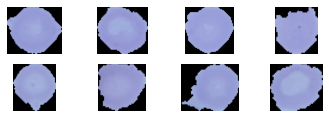

In [14]:
for i, image_path in enumerate(uninfected_cell):

    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = cv2.imread(image_path)
    plt.imshow(img)

plt.show()

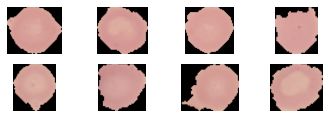

In [18]:
for i, image_path in enumerate(uninfected_cell):

    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(image_path)
    plt.imshow(img)

plt.show()

### Parasitized cells

In [15]:
parasitized_cell = [os.path.join(train_Parasitized, image) for image in os.listdir(train_Parasitized)[pic_index-8:pic_index]]

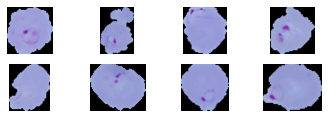

In [16]:
for i, image_path in enumerate(parasitized_cell):

    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = cv2.imread(image_path)
    plt.imshow(img)

plt.show()

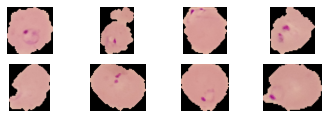

In [19]:
for i, image_path in enumerate(parasitized_cell):

    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(image_path)
    plt.imshow(img)

plt.show()

In [25]:
image_size = (130, 130)

### Performing Image augmentation using ImageDataGenerator

In [26]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10, # Shift the pic width by a max of 5%
    height_shift_range=0.10, # Shift the pic height by a max of 5%
    rescale=1/255, # Rescale the image by normalzing it.
    shear_range=0.1, # Shear means cutting away part of the image (max 10%)
    zoom_range=0.1, # Zoom in by 10% max
    horizontal_flip=True, # Allo horizontal flipping
    fill_mode='nearest' # Fill in missing pixels with the nearest filled value
)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=16,
    color_mode='rgb',
    class_mode='binary'
)

validation_gen = datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=16,
    class_mode='binary',
    shuffle=False,
    color_mode='rgb'
)

Found 27558 images belonging to 2 classes.
Found 15832 images belonging to 2 classes.


#### Setting up numeric labels for the binary image classes

In [27]:
train_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

#### Defining a function to plot the train/test loss and train/test accuracy 

In [28]:
class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []
        

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('Log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="acc")
        ax2.plot(self.x, self.val_acc, label="val_acc")
        ax2.legend()
        
        plt.show()
        
        
plot = PlotLearning()

### Building the CNN Model

In [29]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_size+(3,), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_size+(3,), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_size+(3,), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

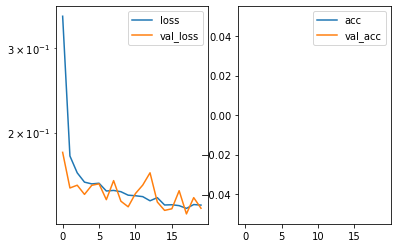

In [31]:
model.fit_generator(train_gen, epochs=20, callbacks=[plot], validation_data=validation_gen)

In [32]:
model.evaluate_generator(validation_gen)

C:\Users\KIIT\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.1396021693944931, 0.9489641189575195]

In [33]:
model.metrics_names

['loss', 'accuracy']

#### Saving the model

In [34]:
model.save(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Model/malaria_detector.h5')

### Model Evaluation

In [39]:
losses = pd.DataFrame(model.history.history)

In [41]:
from tensorflow.keras.preprocessing import image

In [42]:
preds = model.predict_generator(validation_gen)

C:\Users\KIIT\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [43]:
preds

array([[1.9341707e-04],
       [4.0019718e-06],
       [2.6486129e-02],
       ...,
       [9.3851930e-01],
       [9.8326707e-01],
       [7.0507175e-01]], dtype=float32)

In [62]:
classes = validation_gen.classes
classes

array([0, 0, 0, ..., 1, 1, 1])

In [45]:
cat_preds = preds > 0.5

In [46]:
cat_preds

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
print(classification_report(validation_gen.classes,cat_preds))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7952
           1       0.95      0.95      0.95      7880

    accuracy                           0.95     15832
   macro avg       0.95      0.95      0.95     15832
weighted avg       0.95      0.95      0.95     15832



In [53]:
confusion_matrix(validation_gen.classes,cat_preds)

array([[7562,  390],
       [ 386, 7494]], dtype=int64)

### Predicting the cell images

#### Loading paths ofprediction images

In [150]:
image1 = (r'C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\evaluation_images\parasitized\C100P61ThinF_IMG_20150918_144348_cell_144.png')
image2 = (r'C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\evaluation_images\parasitized\C100P61ThinF_IMG_20150918_145422_cell_165.png')
image3 = (r'C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\evaluation_images\parasitized\C184P145ThinF_IMG_20151203_104153_cell_146.png')
image4 = (r'C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\evaluation_images\uninfected\C100P61ThinF_IMG_20150918_144104_cell_34.png')
image5 = (r'C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\evaluation_images\uninfected\C100P61ThinF_IMG_20150918_144348_cell_108.png')
image6 = (r'C:\Users\KIIT\Documents\LGM-Soc contributions\Malaria Detection\Dataset\evaluation_images\uninfected\C103P64ThinF_IMG_20150918_165016_cell_70.png')

#### Defining a function to display the images that are to be predicted 

In [151]:
def show(img):
    image_shape = (130,130,3)
    display = image.load_img(img,target_size=image_shape)
    print("Cell image to be detected whether its infected by Malaria or not :")
    return display

#### Defining a function that will process the image and use the trained CNN model to detect whether the cell is infected by Malaria or not

In [152]:
def detector(cell_img):
    image_shape = (130,130,3)
    display = image.load_img(cell_img,target_size=image_shape) 
    display = image.img_to_array(display)
    display = np.expand_dims(display, axis=0)
    detection = model.predict(display)
    print("\nDetected image label is : ",detection)
    
    if detection[0]>0:
        print("\nCell is healthy and not infected by Malaria")
    
    else:
        print("\nCell is parasitized with Malaria")   

##### Predicting Image1

Cell image to be detected whether its infected by Malaria or not :


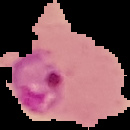

In [153]:
show(image1)

In [154]:
detector(image1)


Detected image label is :  [[0.]]

Cell is parasitized with Malaria


##### Predicting Image2

Cell image to be detected whether its infected by Malaria or not :


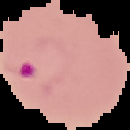

In [155]:
show(image2)

In [156]:
detector(image2)


Detected image label is :  [[0.]]

Cell is parasitized with Malaria


##### Predicting Image3

Cell image to be detected whether its infected by Malaria or not :


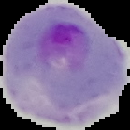

In [157]:
show(image3)

In [158]:
detector(image3)


Detected image label is :  [[0.]]

Cell is parasitized with Malaria


##### Predicting Image4

Cell image to be detected whether its infected by Malaria or not :


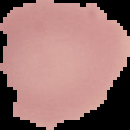

In [159]:
show(image4)

In [160]:
detector(image4)


Detected image label is :  [[1.]]

Cell is healthy and not infected by Malaria


##### Predicting Image5

Cell image to be detected whether its infected by Malaria or not :


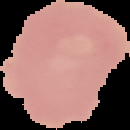

In [161]:
show(image5)

In [162]:
detector(image5)


Detected image label is :  [[1.]]

Cell is healthy and not infected by Malaria


##### Predicting Image6

Cell image to be detected whether its infected by Malaria or not :


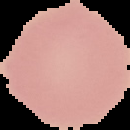

In [163]:
show(image6)

In [164]:
detector(image6)


Detected image label is :  [[1.]]

Cell is healthy and not infected by Malaria


### Here we can see that our trained CNN model predicts all the images with CORRECT labels!!!